In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

target_list = ['readmission', 'mortality', 'los>3day', 'los>7day', 'dx_depth1_unique']

targets_noRead = ['mortality', 'los>3day', 'los>7day', 'dx_depth1_unique']


datasizedep = pd.read_csv('C:/Users/jiyou/Downloads/pool_with_base.csv')

In [2]:
def datasize_dep_plot(result_file:pd.DataFrame, source_file, item, target, subplot_index):
    
    result_file = result_file.loc[:,['bert_induced','bert_model','few_shot','item','seed','source_file','target',
                  'eicu_test_auprc', 'mimic_test_auprc','test_auprc']]

    # Assert error if one seed is present more than once per cell
    groupcheck = result_file.groupby(['source_file','target','item','few_shot','bert_induced','seed']).agg('count')
    assert not (any([any(groupcheck[i]>1) for i in groupcheck.columns])), 'Overlapping seeds'
    # Assert error if more than 10 seeds for single category 
    groupcheck = result_file.groupby(['source_file','target','item','few_shot','bert_induced']).agg('count')
    assert not (any([any(groupcheck[i]>10) for i in groupcheck.columns])), 'At least one cell would aggregate >10 seeds'    
    
    result_file = result_file.drop('seed', axis=1)
    grouped = result_file.groupby(['source_file','target','item','few_shot','bert_induced']).agg(['mean','std'])
    sample = grouped.loc[(source_file, target, item)].reset_index(level=['few_shot','bert_induced'], col_level=1)

    if source_file=='both':
        sample = sample.drop('test_auprc', axis=1)
    else:
        sample = sample.drop(['eicu_test_auprc','mimic_test_auprc'],axis=1)

    # Messy, but the more "elegant" approach was giving me trouble
    BERT = sample.loc[sample.iloc[:,1]] # sample.iloc[:,1] is the "bert_induced" index...

    idx = pd.IndexSlice
    BERTfewshot_levels = BERT.loc[:,idx[:, 'few_shot']].values.flatten()
    BERTmeans = BERT.loc[:,('test_auprc','mean')].values
    BERTupper_sd = BERTmeans + BERT.loc[:,('test_auprc','std')].values
    BERTlower_sd = BERTmeans - BERT.loc[:,('test_auprc','std')].values

    RNN = sample.loc[~sample.iloc[:,1]] # i.e. keep if bert_induced == False
    RNNfewshot_levels = RNN.loc[:,idx[:, 'few_shot']].values.flatten()
    RNNmeans = RNN.loc[:,('test_auprc','mean')].values
    RNNupper_sd = RNNmeans + RNN.loc[:,('test_auprc','std')].values
    RNNlower_sd = RNNmeans - RNN.loc[:,('test_auprc','std')].values

    # Before plotting, a couple of aesthetic things to address
    target_dict = {'readmission':'Readmission', 'mortality':'Mortality', 'los>3day':'LOS > 3 Days',
                   'los>7day':'LOS > 7 Days', 'dx_depth1_unique':'Diagnosis'}
    source_dict = {'eicu':'eICU', 'mimic':'MIMIC-III'}
    
    # Plot
    ax = fig.add_subplot(2, 3, subplot_index)
    
    # BERT induced
    ax.plot(BERTfewshot_levels, BERTmeans, color='crimson', label='DescEmb')
    plt.fill_between(BERTfewshot_levels, BERTupper_sd, BERTlower_sd, facecolor='pink', alpha=0.5)

     # singleRNN
    ax.plot(RNNfewshot_levels, RNNmeans, color='darkblue', label='CodeEmb')
    plt.fill_between(RNNfewshot_levels, RNNupper_sd, RNNlower_sd, facecolor='lightsteelblue', alpha=0.5)

    ax.set_xticks(BERTfewshot_levels, minor=False)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_xlabel('Proportion of Dataset')
    ax.set_ylabel('Test Set AUPRC')
    ax.grid(which='major', axis='x')
    ax.grid(which='major', axis='y')
    plt.title('{} Prediction'.format(target_dict[target]))

    # add
    if subplot_index == 5: # THIS ASSUMES 5 SUBPLOTS! CHANGE IF NEED BE
        plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
        
    fig.suptitle('Datasize Dependence in {} EHR'.format(source_dict[source_file]), fontsize=25)


/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(la

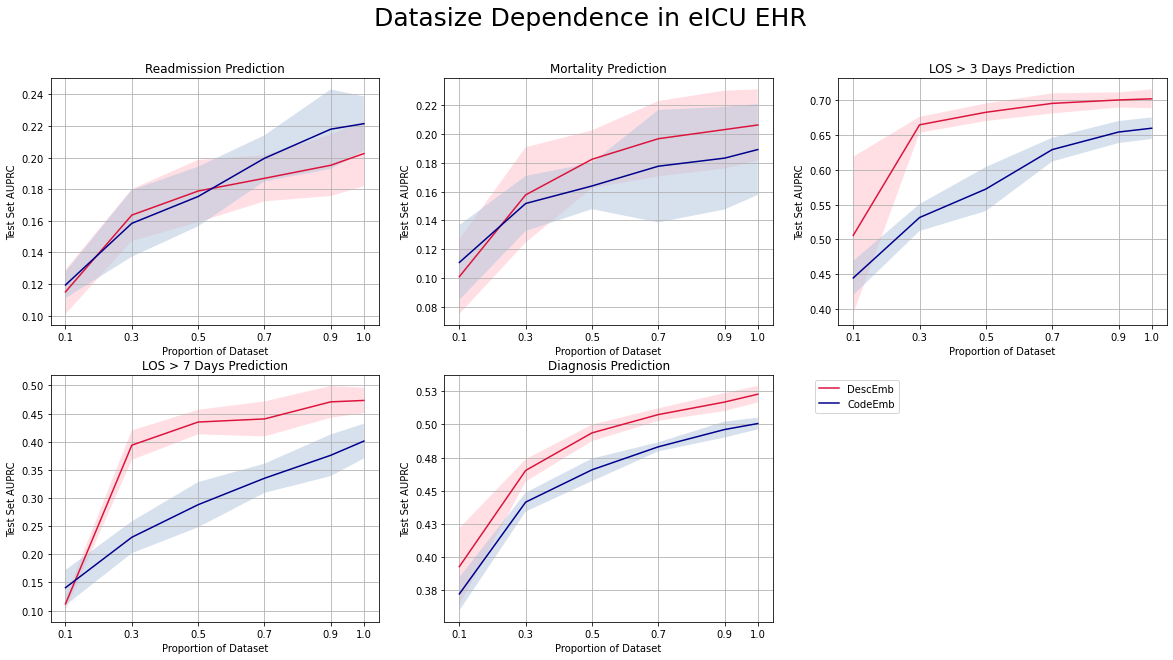

In [3]:
# For targets_noRead
#fig = plt.figure(figsize=(20*.75, 15*.75))

# For target_list
fig = plt.figure(figsize=(20, 10))

for subplot, target in enumerate(target_list): 
    datasize_dep_plot(datasizedep, 'eicu', 'all', target, subplot_index=subplot+1)

/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/Wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(la

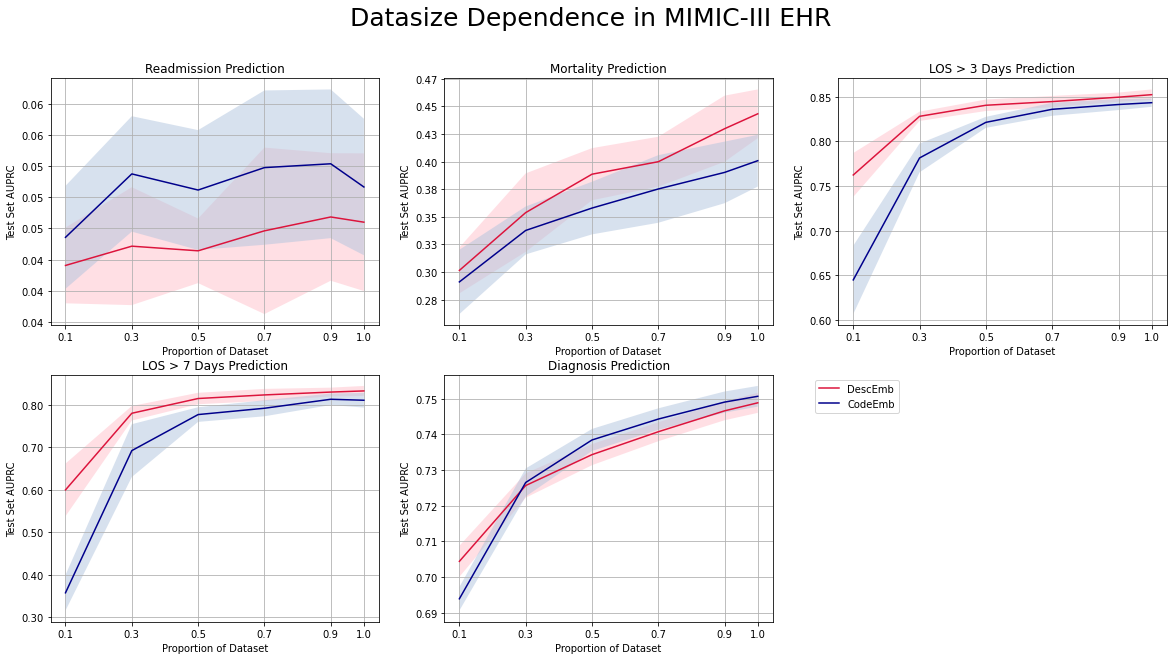

In [4]:
# For targets_noRead
#fig = plt.figure(figsize=(20*.75, 15*.75))

# For target_list
fig = plt.figure(figsize=(20, 10))

for subplot, target in enumerate(target_list): 
    datasize_dep_plot(datasizedep, 'mimic', 'all', target, subplot_index=subplot+1)
    
